# **Machine Learning Project - Student Performance Factors**



**Members**: Harry Fu, Harold Lucero, Fahmid Shahriar Iqbal, Tharun Ramula, Sai Kamal Padmam

# **Dataset Description**

1. Explain the different features
available and their relation with each other.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder , OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
sns.set()

In [ ]:
df_performance = pd.read_csv('/content/StudentPerformanceFactors.csv') #Change for your address
df_performance

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                            No            7               73   
1                            No            8               59   
2                           Yes            7               91   
3                           Yes            8               98   
4                           Yes            6               65   
...                         ...          ...              ...   
6602                         No            7               76   
6603                         No            8               81   
6604                        Yes            6               65   
6605                        Yes            6               91   
6606                        Yes            9               94   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
0                 Low             Yes                  0           Low   
1                 Low             Yes                  2        Medium   
2              Medium             Yes                  2        Medium   
3              Medium             Yes                  1        Medium   
4              Medium             Yes                  3        Medium   
...               ...             ...                ...           ...   
6602           Medium             Yes                  1          High   
6603           Medium             Yes                  3           Low   
6604              Low             Yes                  3           Low   
6605             High             Yes                  2           Low   
6606           Medium             Yes                  0        Medium   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
0             Medium      Public       Positive                  3   
1             Medium      Public       Negative                  4   
2             Medium      Public        Neutral                  4   
3             Medium      Public       Negative                  4   
4               High      Public        Neutral                  4   
...              ...         ...            ...                ...   
6602          Medium      Public       Positive                  2   
6603            High      Public       Positive                  2   
6604          Medium      Public       Negative                  2   
6605          Medium     Private       Positive                  3   
6606          Medium      Public       Positive                  4   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
0                       No              High School               Near   
1                       No                  College           Moderate   
2                       No             Postgraduate               Near   
3                       No              High School           Moderate   
4                       No                  College               Near   
...                    ...                      ...                ...   
6602                    No              High School             

In [ ]:
df = df_performance
numeric_columns = df.select_dtypes(include=['number'])
categorical_columns = df.select_dtypes(include=['object'])
df = df.dropna(axis=0)


**Observations:**

The dataset contains 6,607 rows and 20 columns, tracking various factors influencing student performance. Key factors include Hours_Studied, Attendance, and Previous_Scores, with Exam_Score as the target variable.
Categorical variables like Parental_Involvement and Access_to_Resources provide insights into student backgrounds.
Other factors, such as Extracurricular_Activities and Sleep_Hours, may also impact exam performance.

The dataset explores factors that influence student performance on exams, focusing on characteristics such as study habits, attendance, parental support, access to resources, among others.

As you can see, the dataframe contains 6607 data and each of them has 20 features. Within this, 19 of them are independent characteristics, such as hours of study, hours of sleep, and so on, while the objective characteristic is the exam score.

In [ ]:
df_performance.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [ ]:
df_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

Of the 20 features, 7 of them are numeric, specifically int64, such as hours studied, attendance, sleep hours and so on, while the other 13 are of type object, such as parental_involvement, access to resources and so on.

In [ ]:
df_performance.describe()

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             8.000000           6.000000   101.000000

**Observations:**

Hours Studied: Mean is 20 hours, ranging from 1 to 44.

Attendance: Average is 80%, with a range from 60% to 100%.

Exam Scores: Mean score is 67, with scores between 55 and 101.

#**Feature Description**







**Hours Studied:** This column corresponds to the number of hours the student has studied, with a student having a minimum of 1 hour and a maximum of 44 hours of study.

**Attendance:** A count is kept of class attendance within the time period, where there was one student with a minimum of 60 class attendances and one with a maximum of 100 class attendances.

**Sleep Hours:**This column lets you know that there are students who have slept at least 4 hours per night, while others have slept a maximum of 10 hours per night.

**Previous Scores:** This feature gives details about the student's previous score, where there is a minimum of 50/100 and a maximum of 100/100. The average of this group of students is 75/100.

**Tutoring Sessions:** Gives a detail of the number of tutoring sessions the student has taken, where there are students who have not attended any of them and students who have attended a maximum of 8 of them.

**Physical Activity:** Characteristic that details the number of hours that the student plays sports, assuming that per week, since there are students who do not play sports, that is, a minimum of 0 hours, and students who play sports for at least 6 hours per week.

**Exam Score:** This is the dependent variable of this problem. Here are detailed the grades of each student, having as a minimum a grade of 55/100 and a maximum of 101/100. This value is surely an outlier since the maximum that can be had is 100/100, so it should be verified and removed if necessary.



In [ ]:
object_columns = df_performance.select_dtypes(include=['object'])
object_columns_info = object_columns.describe()
object_columns_info

Parental_Involvement Access_to_Resources Extracurricular_Activities  \
count                  6607                6607                       6607   
unique                    3                   3                          2   
top                  Medium              Medium                        Yes   
freq                   3362                3319                       3938   

       Motivation_Level Internet_Access Family_Income Teacher_Quality  \
count              6607            6607          6607            6529   
unique                3               2             3               3   
top              Medium             Yes           Low          Medium   
freq               3351            6108          2672            3925   

       School_Type Peer_Influence Learning_Disabilities  \
count         6607           6607                  6607   
unique           2              3                     2   
top         Public       Positive                    No   
freq          4598           2638                  5912   

       Parental_Education_Level Distance_from_Home Gender  
count                      6517               6540   6607  
unique                        3                  3      2  
top                 High School               Near   Male  
freq                       3223               3884   3814

In [ ]:
unique_values = {col: df_performance[col].unique() for col in object_columns}
for col, values in unique_values.items():
    print(f"Col: {col}")
    print(f"Unique Values: {values}\n")

Col: Parental_Involvement
Unique Values: ['Low' 'Medium' 'High']

Col: Access_to_Resources
Unique Values: ['High' 'Medium' 'Low']

Col: Extracurricular_Activities
Unique Values: ['No' 'Yes']

Col: Motivation_Level
Unique Values: ['Low' 'Medium' 'High']

Col: Internet_Access
Unique Values: ['Yes' 'No']

Col: Family_Income
Unique Values: ['Low' 'Medium' 'High']

Col: Teacher_Quality
Unique Values: ['Medium' 'High' 'Low' nan]

Col: School_Type
Unique Values: ['Public' 'Private']

Col: Peer_Influence
Unique Values: ['Positive' 'Negative' 'Neutral']

Col: Learning_Disabilities
Unique Values: ['No' 'Yes']

Col: Parental_Education_Level
Unique Values: ['High School' 'College' 'Postgraduate' nan]

Col: Distance_from_Home
Unique Values: ['Near' 'Moderate' 'Far' nan]

Col: Gender
Unique Values: ['Male' 'Female']



**Observations:**

Parental_Involvement, Access_to_Resources, Motivation_Level, and Family_Income all have three distinct levels: "Low", "Medium", and "High."

Extracurricular_Activities, Internet_Access, Learning_Disabilities, and Gender are binary variables with "Yes/No" or "Male/Female" categories.

School_Type has two categories: "Public" and "Private."
Some columns like Teacher_Quality,Parental_Education_Level, and Distance_from_Home contain missing (NaN) values.

Peer_Influence has three distinct categories: "Positive", "Negative", and "Neutral."

**Parental_Involvement:** Details parental involvement in 3 categories: Low, Medium and High.

**Access_to_Resources:** Details the access to resources in the same 3 levels: Low, Medium and High.

**Extracurricular_Activities:** Shows whether or not the student attends extracurricular activities in the YES and NO classes.

**Motivation_Level:** Indicates the motivation level of the student, within the categories of Low, Medium and High.

**Internet_Access:** Specifies whether the student has access to the Internet in the Yes and No categories.

**Family_Income:** Details the income that the student's family has. It is detailed in the categories of Low, Medium and High.

**Teacher_Quality:** Describes the teacher's performance in the Low, Medium and High levels.

**School_Type:** Indicates whether the student attends private or public school.

**Peer_Influence:** Details the influence of peers in the categories of: positive, negative and neutral.

**Learning_Disabilities:** Indicates whether the student has learning Disabilities in the Yes or No classes.

**Parental_Education_Level:** This characteristic has reference to the level of studies that the student's parents have reached. The categories are: High School, College, Postgraduate.

**Distance_from_Home:** It describes the distance from home to school in the categories of: Near, Moderate and Far.

**Gender:** Indicates if the student is Male - Female.


Within each of these characteristics, the group believes that the most important are the hours of study that the student has put in to take the exam and the hours of class attendance, since from experience, these are very important factors that can reflect the performance of the final score on an exam.

Likewise, trying to find a relationship between the data without performing the EDA yet, it can be inferred that the distance from school to home may have some influence on students' class attendance.

In [ ]:
df_performance.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Finally, the dataset has 3 columns that do not have values assigned to some of their data, which will be fixed when performing the EDA. These are in Teacher_Quality, Parental Education Level and Distance from Home.

**Improve the data**

As you can see so far, the dataset has null values in some of the columns, so in one way or another you have to handle them. Being values of type object, what would be suggested would be to fill these values with the fashion that follows its column or to get rid of the rows that do not contain values.

On the other hand it would be good to have all the features in a single data type, so it is suggested to apply encoding to the categorical features, assigning numerical values to the categories such as medium, low, high.

Finally, before passing the data to train the model it would be good to normalize the data and scale them, so that each one contributes uniformly to the training and the model does not become sensitive to one of these values.

Likewise, within the EDA it would be possible to add characteristics based on the combination of those that already exist so that they also contribute to the training of the model.

# **EDA**




Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

***Steps perfomed in EDA***:

1. Drop missing and duplicate values
2. Identify shape of the data
3. Identify significant correlations   
4. Spot/deal with outliers in the dataset


# 1. Drop Missing and Duplicate Values

The dataset has 3 columns that do not have values assigned to some of their data. These are in Teacher_Quality, Parental Education Level and Distance from Home. We simply dropped the rows containing those missing values.

In [ ]:
df_performance = df_performance.dropna()

In [ ]:
df_performance.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [ ]:
df_performance.drop_duplicates()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                            No            7               73   
1                            No            8               59   
2                           Yes            7               91   
3                           Yes            8               98   
4                           Yes            6               65   
...                         ...          ...              ...   
6602                         No            7               76   
6603                         No            8               81   
6604                        Yes            6               65   
6605                        Yes            6               91   
6606                        Yes            9               94   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
0                 Low             Yes                  0           Low   
1                 Low             Yes                  2        Medium   
2              Medium             Yes                  2        Medium   
3              Medium             Yes                  1        Medium   
4              Medium             Yes                  3        Medium   
...               ...             ...                ...           ...   
6602           Medium             Yes                  1          High   
6603           Medium             Yes                  3           Low   
6604              Low             Yes                  3           Low   
6605             High             Yes                  2           Low   
6606           Medium             Yes                  0        Medium   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
0             Medium      Public       Positive                  3   
1             Medium      Public       Negative                  4   
2             Medium      Public        Neutral                  4   
3             Medium      Public       Negative                  4   
4               High      Public        Neutral                  4   
...              ...         ...            ...                ...   
6602          Medium      Public       Positive                  2   
6603            High      Public       Positive                  2   
6604          Medium      Public       Negative                  2   
6605          Medium     Private       Positive                  3   
6606          Medium      Public       Positive                  4   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
0                       No              High School               Near   
1                       No                  College           Moderate   
2                       No             Postgraduate               Near   
3                       No              High School           Moderate   
4                       No                  College               Near   
...                    ...                      ...                ...   
6602                    No              High School             

**Observations:**

After running df_performance.drop_duplicates(), any duplicate rows in the dataset will be removed.
The dataset will retain only unique entries, which helps in ensuring the integrity of the data for analysis.
If there were no duplicates, the shape of the dataset (number of rows) will remain unchanged.

In [ ]:
print(df_performance['Attendance'].dtype)

int64


After droping the the missing values and duplicate rows, the dataset contains 6378 data points

# 2.  Checking the shape of the data

### Countplot for categorical data

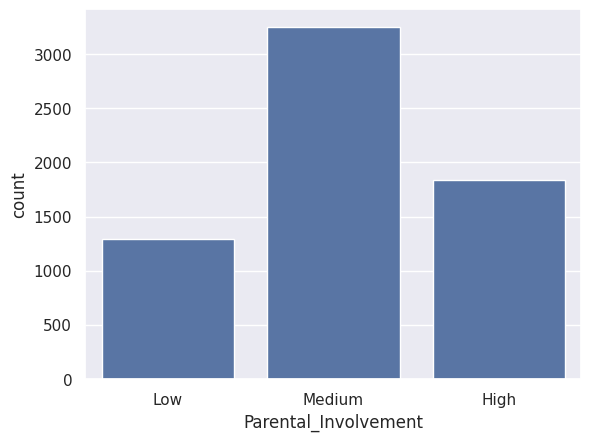

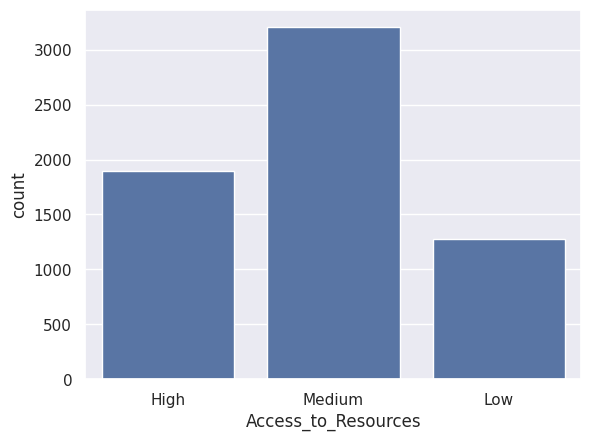

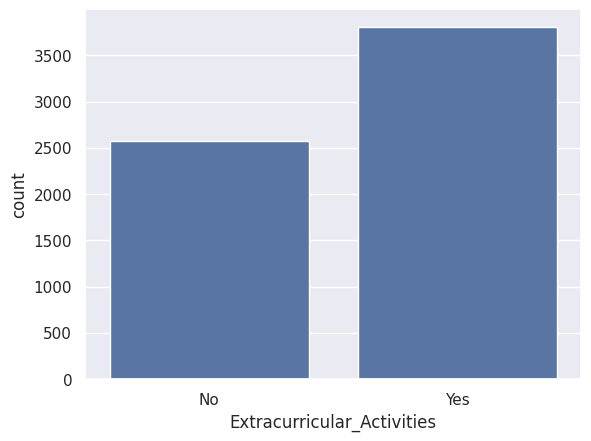

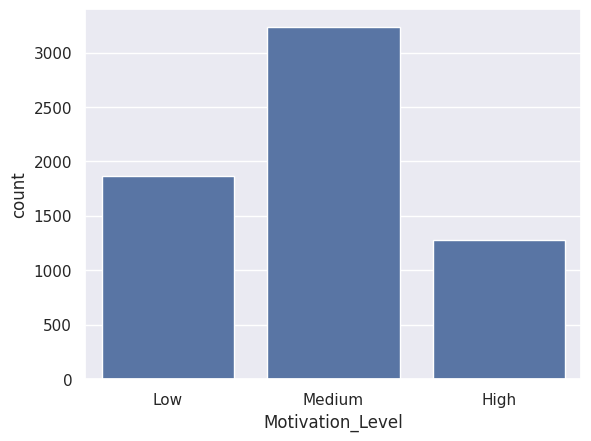

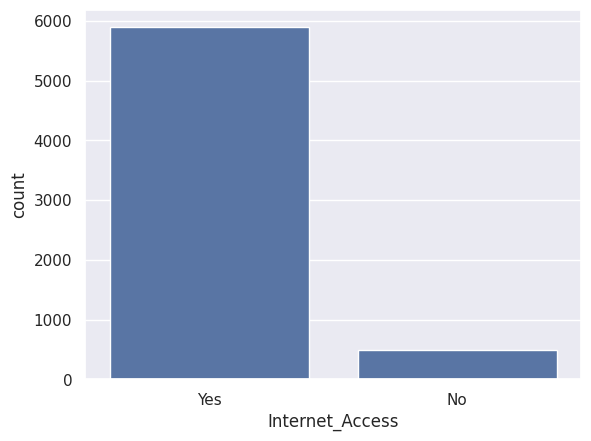

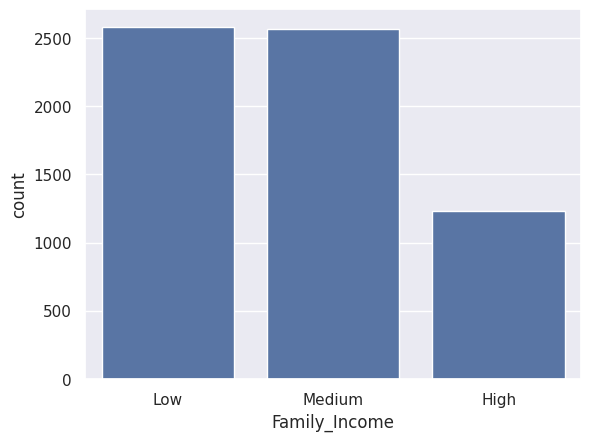

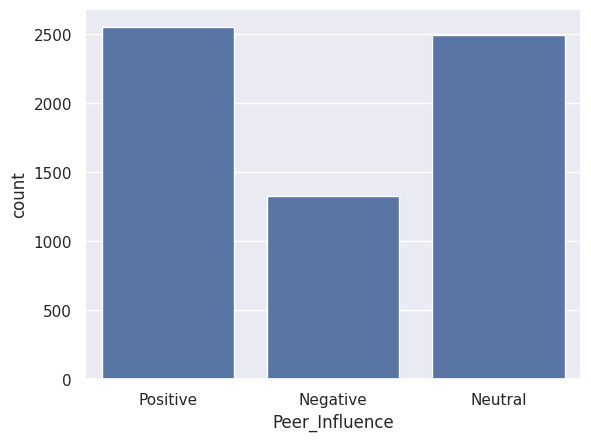

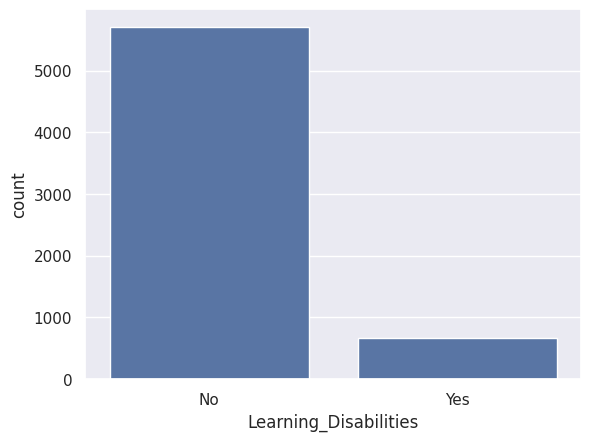

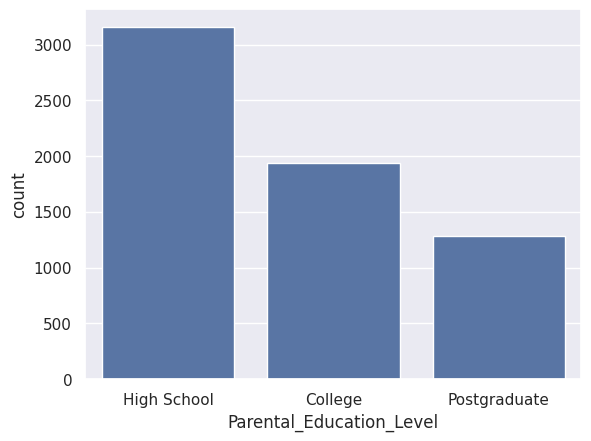

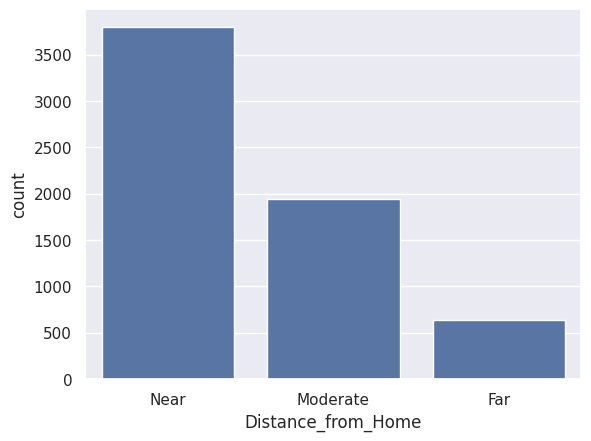

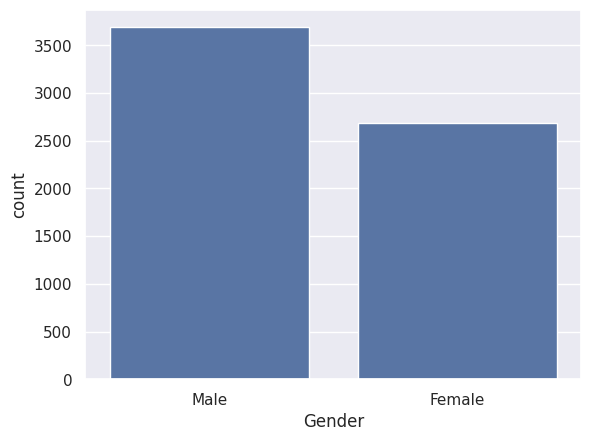

In [ ]:
for col in df_performance:
    if df_performance[col].dtype == 'O':
        sns.countplot(x=col,data=df_performance)
        plt.show()


**Observations:**

Count plots were generated for each categorical column to visualize the distribution of their unique values.

For columns like Parental_Involvement, Access_to_Resources, and Motivation_Level, the plots revealed the frequency of "Low", "Medium", and "High" categories.

In binary columns like Gender and Internet_Access, the count plots showed the distribution of "Male/Female" and "Yes/No" values.

This visualization provides a clear understanding of the proportion of different categories in the dataset, aiding further analysis.

### Distribution analysis of numerical values

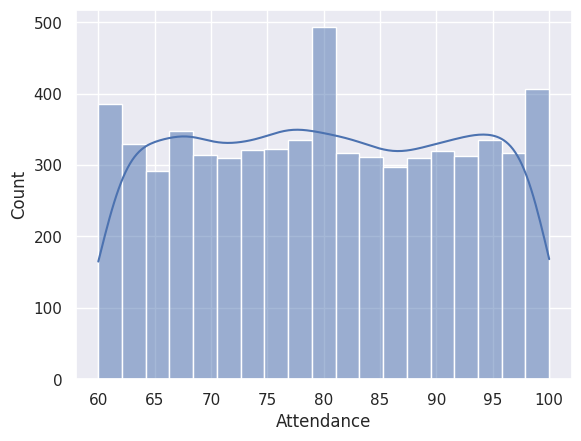

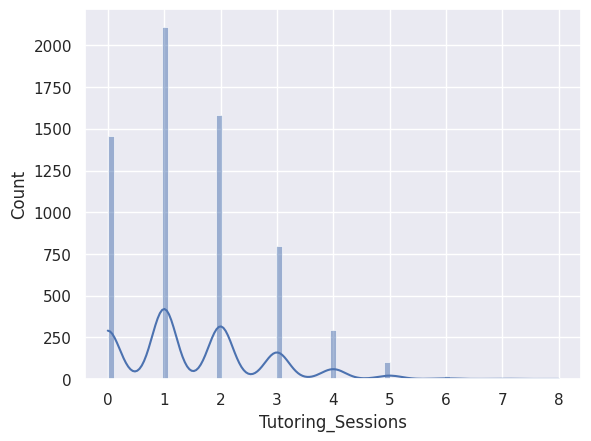

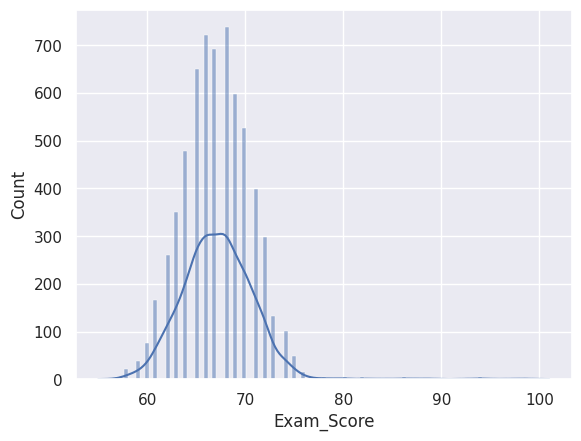

In [ ]:
for col in df_performance:
    if df_performance[col].dtype != 'O':
        sns.histplot(df_performance[col],kde=True)
        plt.show()

**Observations:**

Histograms with KDE (Kernel Density Estimation) plots were generated for all numerical columns.

These plots show the distribution of continuous variables like Hours_Studied, Attendance, and Exam_Score.

The shape of the distribution (e.g., normal, skewed) can be seen, helping to identify patterns or potential outliers.

KDE overlays provide a smoothed estimate of the data distribution, offering insights into where most data points are concentrated.

This provides a clear visualization of the distribution of numerical features in the dataset.

Based on the distribution of the numerical variables, it is evident Hours_studied, Sleep Hours, Physical Activity and Exam Score follow normal distribution.

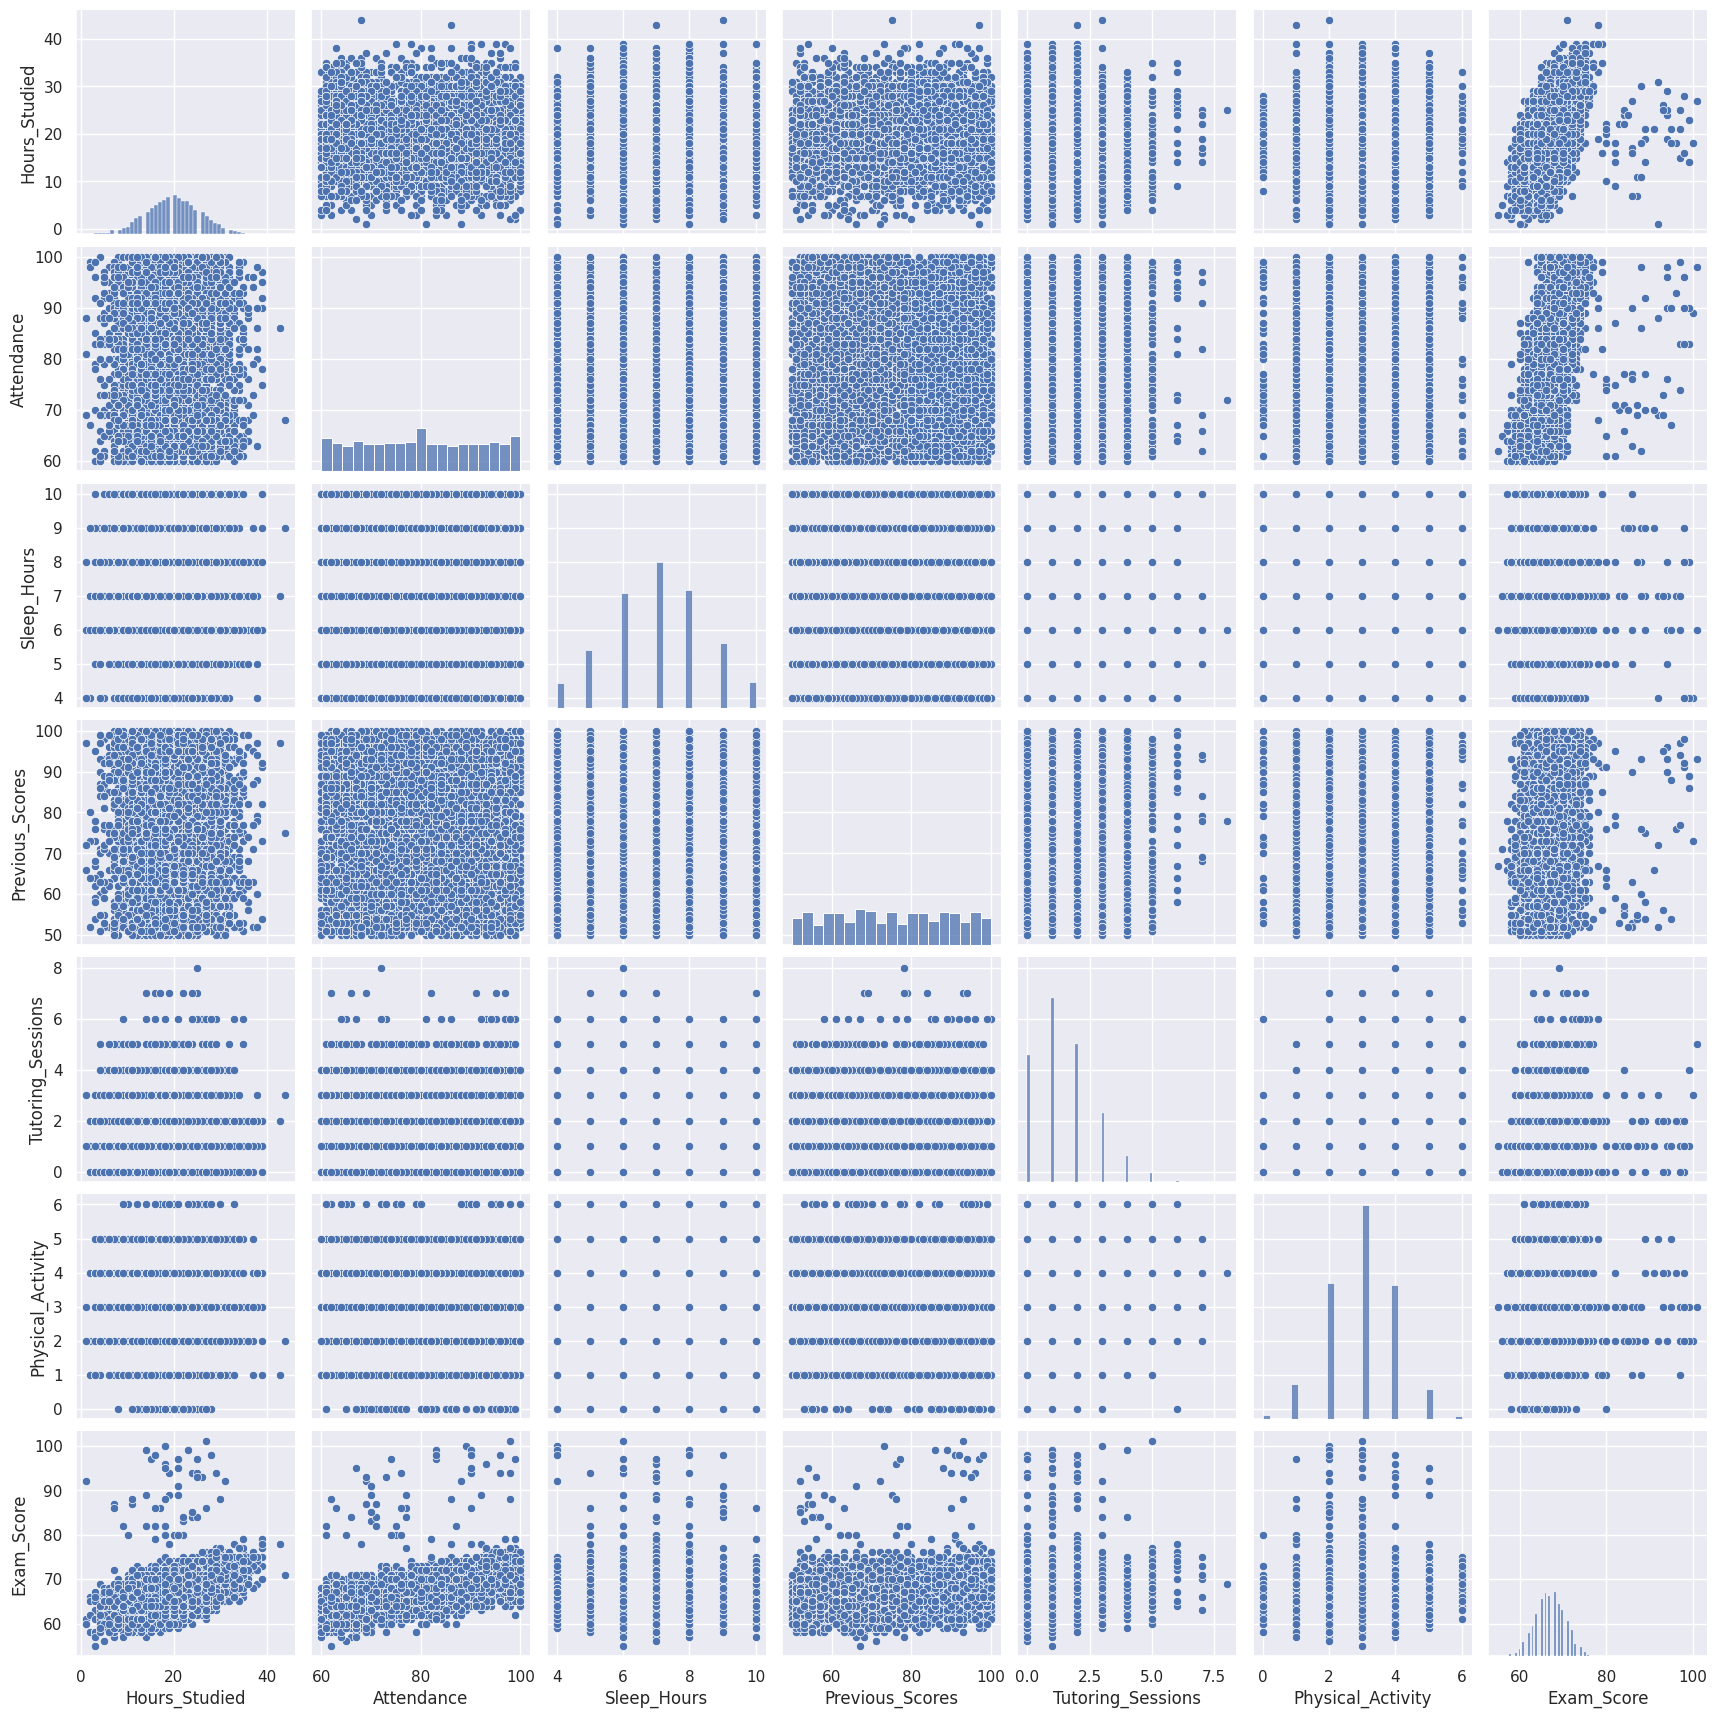

In [ ]:
sns.pairplot(df_performance, vars=['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score' ])
plt.show()

**Observations:**

A pairplot was generated for the variables Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Tutoring_Sessions, Physical_Activity, and Exam_Score.

The pairplot provides scatter plots for each pair of variables, allowing for a visual examination of relationships or correlations between them.
Diagonal plots represent the distribution (histograms) of each individual variable.

This visualization helps identify trends, such as whether higher hours studied correlate with better exam scores, or how attendance may influence performance.

These insights can guide further analysis on potential relationships between student performance factors.

Pairplot function from the seaborn library is used here to visualize pairwise relationships of the numerical values in the dataset. It creates a grid of subplots where each subplot is a scatterplot of two features, and each feature is compared against every other feature.It also shows histograms plots along the diagonal to illustrate the distribution of each feature.

In [ ]:
num_col = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Sleep_Hours']
cat_col = ['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender']
target = 'Exam_Score'

### Relationship between the numerical variables and the target variable(by Scatterplot)

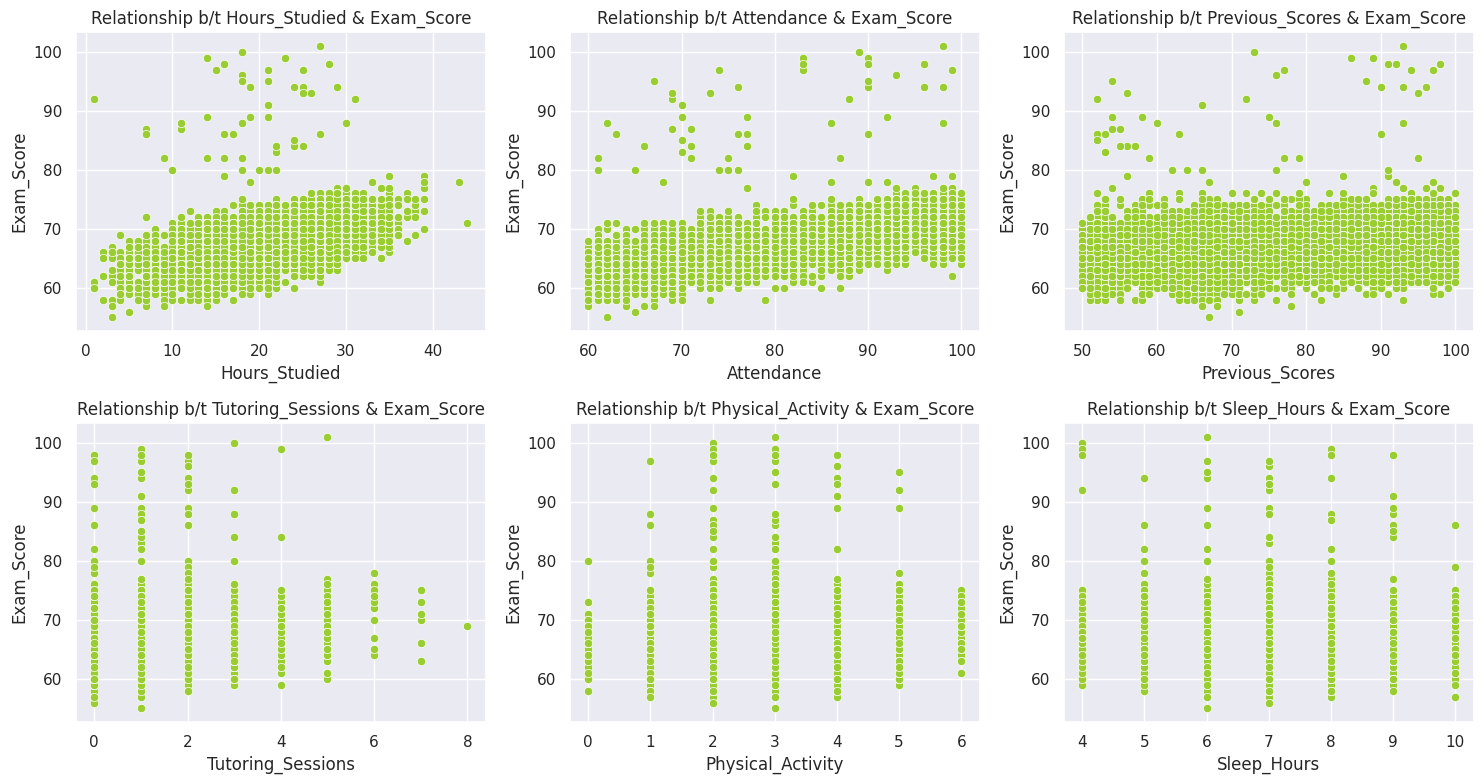

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, col in enumerate(num_col):
    sns.scatterplot(x=df_performance[col], y=df_performance[target], ax=axes[idx], color='yellowgreen')
    axes[idx].set_title(f'Relationship b/t {col} & {target}')
    #plt.xlabel(col)
    #plt.ylabel(target)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel(target)

# Hide the unused subplot
for i in range(len(num_col), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Observations:**

Scatter plots were created to visualize the relationship between each numerical variable and the target variable (Exam_Score).

The scatter plots display individual data points and help identify trends or patterns between variables like Hours_Studied, Attendance, and Exam_Score.
The title of each plot highlights the relationship between the numerical variable and the target variable.

This visualization helps in determining whether there are positive or negative correlations between student performance factors and their final exam scores.

This gives a clear idea of how each factor may impact the exam scores.

The most notable positive relationship is seen between hours studied and exam scores, suggesting that time spent studying is a key factor in exam performance.
Attendance may have a slight positive effect, but it's not very pronounced.
Previous scores, tutoring sessions, and physical activity don't show strong predictive power over the exam scores based on these scatterplots.

In [ ]:
# A copy of the original DataFrame for capping the outliers.
df_cap = df.copy()

# In each numeric column: find and cap outliers.
for i in numeric_columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    print(f'{i}: Upper limit = {upper_limit} Lower limit = {lower_limit}')

    #outliers above and below the limits.
    #outliers_upper = np.where(df[i] > upper_limit)[0]
    #outliers_lower = np.where(df[i] < lower_limit)[0]

    # Cap the outliers for the current column.
    df_cap[i] = np.where(
        df_cap[i] > upper_limit,
        upper_limit,
        np.where(
            df_cap[i] < lower_limit,
            lower_limit,
            df_cap[i]
        )
    )


ohe = OneHotEncoder(sparse_output=False,drop='first')
oe1 = OrdinalEncoder(categories='auto')
oe2 = OrdinalEncoder(categories=[['Negative','Neutral','Positive']])
oe3 = OrdinalEncoder(categories=[['High School','College','Postgraduate']])
oe4 = OrdinalEncoder(categories=[['Near','Moderate','Far']])

clf = ColumnTransformer(transformers=[
    ('tf1', ohe, [4,8,12,15,18]),
    ('tf2', oe1, [2,3,7,10,11]),
    ('tf3', oe2, [13]),
    ('tf4', oe3, [16]),
    ('tf5', oe4, [17])
], remainder='passthrough')

df_transform = clf.fit_transform(df_cap)
df_transform = pd.DataFrame(df_transform,columns=clf.get_feature_names_out())
df_transform

Hours_Studied: Upper limit = 36.0 Lower limit = 4.0
Attendance: Upper limit = 120.0 Lower limit = 40.0
Sleep_Hours: Upper limit = 11.0 Lower limit = 3.0
Previous_Scores: Upper limit = 125.5 Lower limit = 25.5
Tutoring_Sessions: Upper limit = 3.5 Lower limit = -0.5
Physical_Activity: Upper limit = 7.0 Lower limit = -1.0
Exam_Score: Upper limit = 75.0 Lower limit = 59.0


tf1__Extracurricular_Activities_Yes  tf1__Internet_Access_Yes  \
0                                     0.0                       1.0   
1                                     0.0                       1.0   
2                                     1.0                       1.0   
3                                     1.0                       1.0   
4                                     1.0                       1.0   
...                                   ...                       ...   
6373                                  0.0                       1.0   
6374                                  0.0                       1.0   
6375                                  1.0                       1.0   
6376                                  1.0                       1.0   
6377                                  1.0                       1.0   

      tf1__School_Type_Public  tf1__Learning_Disabilities_Yes  \
0                         1.0                             0.0   
1                         1.0                             0.0   
2                         1.0                             0.0   
3                         1.0                             0.0   
4                         1.0                             0.0   
...                       ...                             ...   
6373                      1.0                             0.0   
6374                      1.0                             0.0   
6375                      1.0                             0.0   
6376                      0.0                             0.0   
6377                      1.0                             0.0   

      tf1__Gender_Male  tf2__Parental_Involvement  tf2__Access_to_Resources  \
0                  1.0                        1.0                       0.0   
1                  0.0                        1.0                       2.0   
2                  1.0                        2.0                       2.0   
3                  1.0                        1.0                       2.0   
4                  0.0                        2.0                       2.0   
...                ...                        ...                       ...   
6373               0.0                        0.0                       2.0   
6374               0.0                        0.0                       2.0   
6375               0.0                        2.0                       1.0   
6376               0.0                        0.0                       0.0   
6377               1.0                        2.0                       1.0   

      tf2__Motivation_Level  tf2__Family_Income  tf2__Teacher_Quality  \
0                       1.0                 1.0                   2.0   
1                       1.0                 2.0                   2.0   
2                       2.0                 2.0                   2.0   
3                       2.0                 2.0                   2.0   
4                       2.0                 2.0                   0.0   
...                     ...                 ...                   ...   
6373                    2.0                 0.0                   2.0   
6374                    2.0                 1.0                   0.0   
6375                    1.0                 1.0                   2.0   
6376                    0.0                 1.0                   2.0   
6377                    2.0                 2.0                   2.0   

      tf3__Peer_Influence  tf4__Parental_Education_Level  \
0                     2.0                            0.0   
1                     0.0                            1.0   
2                     1.0                            2.0   
3                     0.0                            0.0   
4                     1.0                            1.0   
...                   ...                            ...   
6373                  2.0                            0.0   
6374                  2.0                            0.0   
6375  

### Relationship between the categorical variables and the target variable(by Boxplot)

In [ ]:
fig, axes = plt.subplots(7, 2, figsize=(15, 60))

axes = axes.ravel()

for idx, col in enumerate(cat_col):
    sns.boxplot(x=df_performance[col], y=df_performance[target], ax=axes[idx])
    axes[idx].set_title(f'Relationship between {col} and {target}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel(target)
for i in range(len(cat_col), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

**Observations:**

Boxplots were generated to analyze the relationship between each categorical variable and the target variable (Exam_Score).

The plots display the distribution of Exam_Score across different categories in variables like Parental_Involvement, Access_to_Resources, and School_Type.

The boxplots provide insight into the spread of exam scores within each category, showing median values, interquartile ranges, and potential outliers.

This visualization helps identify which categories of students tend to perform better or worse on exams.

This provides a clear view of how different categorical factors may influence student performance.











According to the box plot we can see that, the higher the parental involvement, access to learning materials and the internet and absence of learning disabilities, the higher the median test score.<br>

Variables that do not influence the median test score :
 'Extracurricular_Activities', 'Motivation_Level', 'Teacher_Quality', "School_Type','Physical_Activity', 'Gender'

# 3. Identify Significant Co-relations

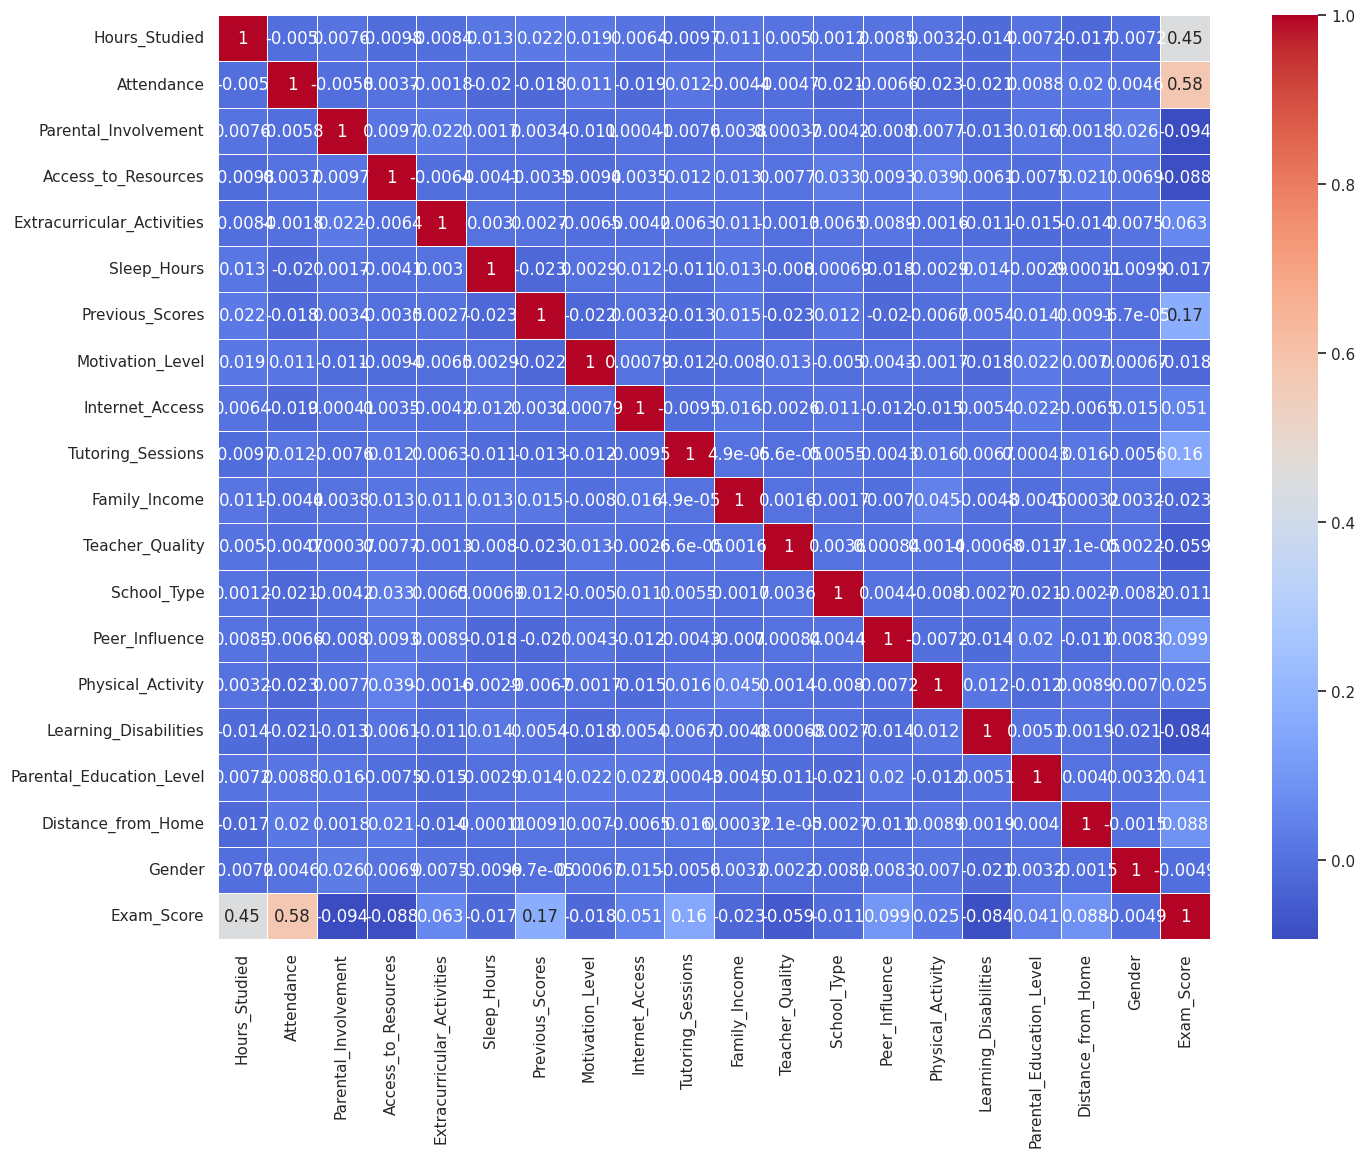

In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoders = {}
for column in cat_col:
    le = LabelEncoder()
    df_performance.loc[:, column] = le.fit_transform(df_performance[column])
    label_encoders[column] = le



df_performance.head(10)

plt.figure(figsize=(16, 12))
correlation_matrix = df_performance.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

**Observations:**

Categorical columns were encoded using LabelEncoder, converting them into numerical values for analysis.

A heatmap of the correlation matrix was generated to visualize the relationships between numerical features, including the encoded categorical variables and Exam_Score.

The heatmap highlights positive and negative correlations. Darker colors indicate stronger correlations, while lighter colors suggest weaker relationships.

This visualization helps identify which factors, such as Hours_Studied or Attendance, are most strongly correlated with Exam_Score.

This provides a clear understanding of how different features relate to one another and impact the target variable.

The heatmap visually represents the correlations from the dataset. The correlation shows how strongly each pair of variables is related, with values ranging from -1 to 1. The relation measures the strength of the linear relationship between two variables.<br>
**High Correlation with Exam Score:**<br>
Attendance (0.58): This is the highest positive correlation, indicating that a student's attendance is a strong predictor of their current exam score.<br>
Hours Studied (0.45): This also shows a moderately positive relationship with exam score.

# 4. Detecting and Handling Outliers

In [ ]:
# Detecting the outliers
sns.boxplot(df_performance['Hours_Studied'])

<Axes: ylabel='Hours_Studied'>

**Observations:**

A boxplot for Hours_Studied was generated to detect potential outliers.
The boxplot shows the distribution of hours studied, including the median, interquartile range (IQR), and any outliers represented as points outside the whiskers.

Outliers, if present, are values that fall outside 1.5 times the IQR, indicating students who studied significantly more or less than average.

Identifying these outliers is important as they may impact the analysis or model performance.

This gives a visual representation of how Hours_Studied varies among students and whether extreme values exist.

There are some outliers present in the 'Hours_Studied' feature. We can detect it from the boxplot.

In [ ]:
# Removing the outliers
row_index1 = df_performance[df_performance['Hours_Studied'] >40].index
df_performance.drop(row_index1, inplace = True)

<ipython-input-21-22ae9219b9bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_performance.drop(row_index1, inplace = True)


<Axes: ylabel='Hours_Studied'>

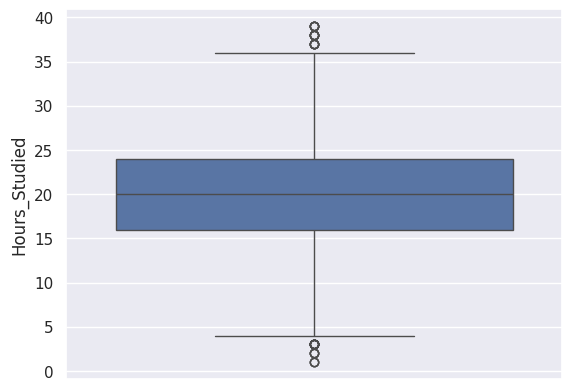

In [ ]:
sns.boxplot(df_performance['Hours_Studied'])

All rows from the df_performance DataFrame have been removed where the value in the Hours_Studied column exceeds 40.

<Axes: ylabel='Attendance'>

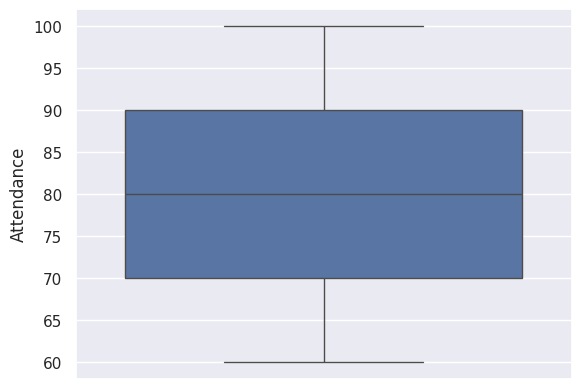

In [ ]:
# Detecting the outliers
sns.boxplot(df_performance['Attendance'])

**Observations:**

The boxplot for Attendance displays the distribution of attendance percentages among students.

It shows key statistics, including the median, quartiles, and potential outliers.

Outliers are indicated as points outside the whiskers, representing students with attendance rates significantly higher or lower than the majority.

This visualization helps in assessing the range of attendance among students and identifying any extreme values that could affect overall performance evaluations.

final observation: No outliers

<Axes: ylabel='Previous_Scores'>

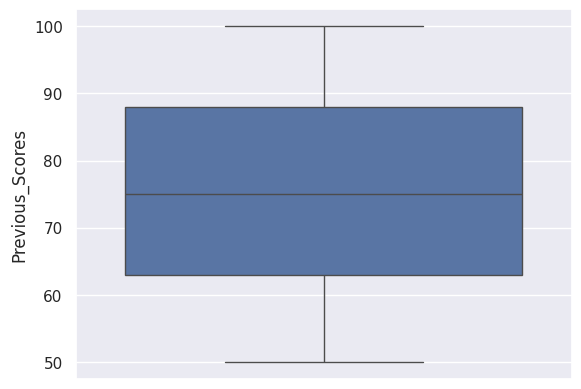

In [ ]:
# Detecting the outliers
sns.boxplot(df_performance['Previous_Scores'])

No outliers

In [ ]:
# Detecting the outliers
sns.boxplot(df_performance['Tutoring_Sessions'])

<Axes: ylabel='Tutoring_Sessions'>

In [ ]:
# Removing the outliers
row_index3 = df_performance[df_performance['Tutoring_Sessions'] > 5].index

df_performance.drop(index=row_index3, inplace=True)


<ipython-input-26-be2db6c4f881>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_performance.drop(index=row_index3, inplace=True)


<Axes: ylabel='Tutoring_Sessions'>

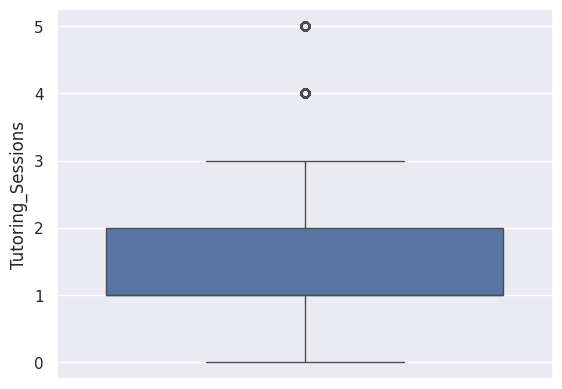

In [ ]:
sns.boxplot(df_performance['Tutoring_Sessions'])

The DataFrame will only include rows where the number of tutoring sessions is 5 or fewer, effectively removing what is considered an outlier in this context.

<Axes: ylabel='Physical_Activity'>

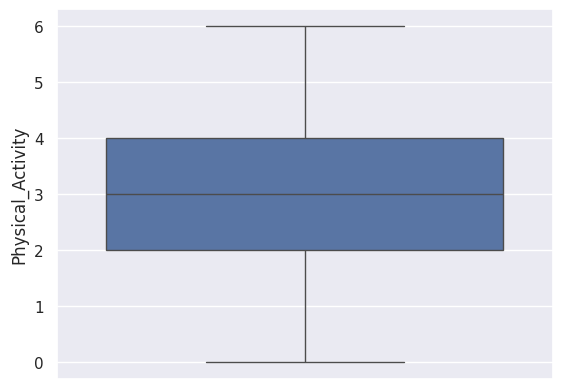

In [ ]:
# Dtecting the outliers
sns.boxplot(df_performance['Physical_Activity'])

No outliers

# 5. Supervised Model

Remove the last outliers based on the Z-Score and divide in training and validation subsets.

In [ ]:
z_score = np.abs((df_performance - df_performance.mean()) / df_performance.std())
threshold = 3

df_no_outliers = df_performance[(z_score < threshold).all(axis=1)]


In [ ]:
scaler = MinMaxScaler()
# Select numerical columns to scale
numerical_cols = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Sleep_Hours']

# Fit and transform the scaler on the numerical columns
df_no_outliers.loc[:, numerical_cols] = scaler.fit_transform(df_no_outliers[numerical_cols])

X = df_no_outliers.drop('Exam_Score', axis=1)
y = df_no_outliers['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Now df_no_outliers has the numerical features scaled between 0 and 1
df_no_outliers.head()

<ipython-input-54-f86fe7deeabb>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.58823529 0.47058824 0.61764706 ... 0.5        0.20588235 0.35294118]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_no_outliers.loc[:, numerical_cols] = scaler.fit_transform(df_no_outliers[numerical_cols])
<ipython-input-54-f86fe7deeabb>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.6   0.1   0.95  ... 0.75  0.65  0.175]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_no_outliers.loc[:, numerical_cols] = scaler.fit_transform(df_no_outliers[numerical_cols])
<ipython-input-54-f86fe7deeabb>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.46 0.18 0.82 ... 0.3  0.82 0.88]' has dtype incompatible w

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0       0.588235       0.600                    1                   0   
1       0.470588       0.100                    1                   2   
2       0.617647       0.950                    2                   2   
3       0.764706       0.725                    1                   2   
4       0.470588       0.800                    2                   2   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                          0     0.500000             0.46                1   
1                          0     0.666667             0.18                1   
2                          1     0.500000             0.82                2   
3                          1     0.666667             0.96                2   
4                          1     0.333333             0.30                2   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0               1                0.0             1               2   
1               1                0.4             2               2   
2               1                0.4             2               2   
3               1                0.2             2               2   
4               1                0.6             2               0   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0           1              2           0.500000                     0   
1           1              0           0.666667                     0   
2           1              1           0.666667                     0   
3           1              0           0.666667                     0   
4           1              1           0.666667                     0   

  Parental_Education_Level Distance_from_Home Gender  Exam_Score  
0                        1                  2      1          67  
1                        0                  1      0          61  
2                        2                  2      1          74  
3                        1                  1      1          71  
4                        0                  2      0          70

**Linear Regression**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = model.predict(X_test)
r2 = r2_score(y_test, pred)

print(f"Linear Regression R^2 Score = {r2}")

Linear Regression R^2 Score = 0.8825640845031235


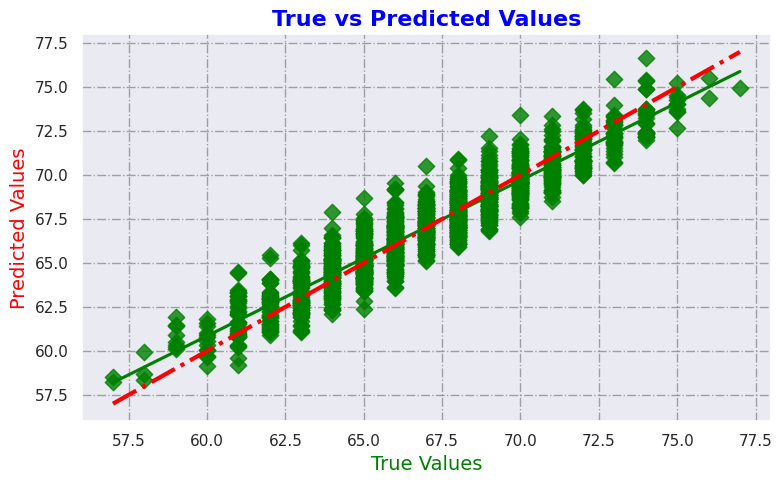

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(x=y_test, y=pred, ci=None, color='green', marker='D', scatter_kws={'s':70, 'alpha':0.8})

# Plotting reference line for perfect prediction
max_val = max(max(y_test), max(pred))
min_val = min(min(y_test), min(pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-.', lw=3)

# Setting plot titles and labels
plt.title('True vs Predicted Values', fontsize=16, fontweight='bold', color='blue')
plt.xlabel('True Values', fontsize=14, color='green')
plt.ylabel('Predicted Values', fontsize=14, color='red')

# Adding grid and adjusting layout
plt.grid(True, linestyle='-.', alpha=0.7, color='grey')

plt.tight_layout()
plt.show()

In [ ]:
mse = mean_squared_error(y_test, pred)
print(f"Mean Squared Error (MSE) = {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) = {rmse}")

Mean Squared Error (MSE) = 1.2615364555971058
Root Mean Squared Error (RMSE) = 1.1231813992392796


In [ ]:
import pickle

# Save the trained model to a file
with open('student_performance_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the scaler to a file
with open('student_performance_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Save the label encoders to a file
with open('student_performance_label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)
print("Model exported successfully!")


Model exported successfully!


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Defining the hyperparameter search space
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Configuring the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Configuration of GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # Cross Validation
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Training the model with hyperparameter search
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
# Best model after hyperparameter search
best_rf_model = grid_search.best_estimator_
print(f"Best hyperparameters: {grid_search.best_params_}")

# Make predictions with the best model.
rf_pred = best_rf_model.predict(X_test)

# Evaluate the model
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest R^2 Score = {rf_r2}")

rf_mse = mean_squared_error(y_test, rf_pred)
print(f"Random Forest Mean Squared Error (MSE) = {rf_mse}")

rf_rmse = np.sqrt(rf_mse)
print(f"Random Forest Root Mean Squared Error (RMSE) = {rf_rmse}")



Best hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Random Forest R^2 Score = 0.8735751260825296
Random Forest Mean Squared Error (MSE) = 1.3580988973121983
Random Forest Root Mean Squared Error (RMSE) = 1.1653750028691188


In [ ]:
# Plot the Results
plt.figure(figsize=(8, 5))
sns.regplot(x=y_test, y=rf_pred, ci=None, color='green', marker='D', scatter_kws={'s':70, 'alpha':0.8})
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Random Forest)')
plt.show()




In [ ]:
# Save the best model
with open('student_performance_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)
print("Random Forest Model exported successfully!")

Random Forest Model exported successfully!


# 6. Unsupervised Model

In [ ]:
#Split between x and y
x_uns = df_transform.iloc[:,0:19]
y_uns = df_transform.iloc[:,19:]
y_uns = np.array(y_uns)
y_uns= y_uns.reshape(-1)




In [ ]:
scale = StandardScaler()
clf2 = ColumnTransformer(transformers=[
    ('scale',scale,x_uns.columns)
])
x_scaled = clf2.fit_transform(x_uns)
x_scaled = pd.DataFrame(x_scaled, columns=clf2.get_feature_names_out())
x_scaled




scale__tf1__Extracurricular_Activities_Yes  \
0                                      -1.216859   
1                                      -1.216859   
2                                       0.821788   
3                                       0.821788   
4                                       0.821788   
...                                          ...   
6373                                   -1.216859   
6374                                   -1.216859   
6375                                    0.821788   
6376                                    0.821788   
6377                                    0.821788   

      scale__tf1__Internet_Access_Yes  scale__tf1__School_Type_Public  \
0                            0.286882                        0.662141   
1                            0.286882                        0.662141   
2                            0.286882                        0.662141   
3                            0.286882                        0.662141   
4                            0.286882                        0.662141   
...                               ...                             ...   
6373                         0.286882                        0.662141   
6374                         0.286882                        0.662141   
6375                         0.286882                        0.662141   
6376                         0.286882                       -1.510253   
6377                         0.286882                        0.662141   

      scale__tf1__Learning_Disabilities_Yes  scale__tf1__Gender_Male  \
0                                 -0.342035                 0.854045   
1                                 -0.342035                -1.170899   
2                                 -0.342035                 0.854045   
3                                 -0.342035                 0.854045   
4                                 -0.342035                -1.170899   
...                                     ...                      ...   
6373                              -0.342035                -1.170899   
6374                              -0.342035                -1.170899   
6375                              -0.342035                -1.170899   
6376                              -0.342035                -1.170899   
6377                              -0.342035                 0.854045   

      scale__tf2__Parental_Involvement  scale__tf2__Access_to_Resources  \
0                            -0.256457                        -1.383013   
1                            -0.256457                         0.913487   
2                             0.899504                         0.913487   
3                            -0.256457                         0.913487   
4                             0.899504                         0.913487   
...                                ...                              ...   
6373                         -1.412418                         0.913487   
6374                         -1.412418                         0.913487   
6375                          0.899504                        -0.234763   
6376                         -1.412418                        -1.383013   
6377                          0.899504                        -0.234763   

      scale__tf2__Motivation_Level  scale__tf2__Family_Income  \
0                        -0.392403                  -0.282118   
1                        -0.392403                   1.064699   
2                         0.884508                   1.064699   
3                         0.884508                   1.064699   
4                         0.884508                   1.064699   
...                            ...                        ...   
6373                      0.884508                  -1.628935   
6374                      0.884508                  -0.282118   
6375                     -0.392403                  -0.282118   
6376                     -1.669314                  -0.282118   
6377                   

In [ ]:
modelL = LinearRegression()
modelR = RandomForestRegressor()
modelK = KNeighborsRegressor()




In [ ]:
# seperate train and test data
x_train_uns , x_test_uns , y_train_uns , y_test_uns = train_test_split(x_uns,y_uns,test_size=0.2,random_state=365)
print(x_train_uns.shape)
print(x_test_uns.shape)
print(y_train_uns.shape)
print(y_test_uns.shape)



(5102, 19)
(1276, 19)
(5102,)
(1276,)


In [ ]:
print("Training Model R2 Scores in respect to # of components:")
for i in range(1,20):
    pca = PCA(n_components=i, whiten=True)
    x_train_pca = pca.fit_transform(x_train_uns)
    x_test_pca = pca.transform(x_test_uns)
    modelL.fit(x_train_pca,y_train_uns)
    modelR.fit(x_train_pca,y_train_uns)
    modelK.fit(x_train_pca,y_train_uns)

    y_predL = modelL.predict(x_test_pca)
    y_predR = modelR.predict(x_test_pca)
    y_predK = modelK.predict(x_test_pca)

    print(f"{i} Components| Linear: {r2_score(y_test_uns,y_predL):.4f},\
    Random Forest: {r2_score(y_test_uns,y_predR):.4f},\
    KNN: {r2_score(y_test_uns,y_predK):.4f}")

Training Model R2 Scores in respect to # of components:
1 Components| Linear: 0.0399,    Random Forest: -0.4170,    KNN: -0.1696
2 Components| Linear: 0.4878,    Random Forest: 0.4292,    KNN: 0.3814
3 Components| Linear: 0.7322,    Random Forest: 0.6782,    KNN: 0.6910
4 Components| Linear: 0.7322,    Random Forest: 0.6991,    KNN: 0.6832
5 Components| Linear: 0.7617,    Random Forest: 0.7250,    KNN: 0.6999
6 Components| Linear: 0.7634,    Random Forest: 0.7352,    KNN: 0.6906
7 Components| Linear: 0.7692,    Random Forest: 0.7488,    KNN: 0.6735
8 Components| Linear: 0.7898,    Random Forest: 0.7856,    KNN: 0.6994
9 Components| Linear: 0.7900,    Random Forest: 0.7962,    KNN: 0.7225
10 Components| Linear: 0.7981,    Random Forest: 0.8004,    KNN: 0.7340
11 Components| Linear: 0.8040,    Random Forest: 0.8009,    KNN: 0.7206
12 Components| Linear: 0.8148,    Random Forest: 0.8088,    KNN: 0.7072
13 Components| Linear: 0.8154,    Random Forest: 0.8119,    KNN: 0.6937
14 Components| 

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.53520385, 0.88108314, 0.97324237, 0.97872543, 0.98179521,
       0.98457518, 0.98666382, 0.98861536, 0.99054653, 0.99213704,
       0.99371005, 0.99519192, 0.99661366, 0.99778273, 0.99841472,
       0.99903056, 0.99957731, 0.99981781, 1.        ])

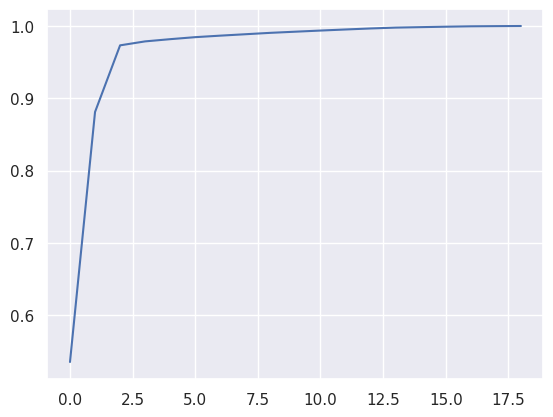

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
modelL.fit(x_train_uns,y_train_uns)
modelR.fit(x_train_uns,y_train_uns)
modelK.fit(x_train_uns,y_train_uns)

y_predL = modelL.predict(x_test_uns)
y_predR = modelR.predict(x_test_uns)
y_predK = modelK.predict(x_test_uns)

print(f"All columns used for training - Linear: {r2_score(y_test_uns,y_predL):.4f},\
    Random Forest: {r2_score(y_test_uns,y_predR):.4f},\
    KNN: {r2_score(y_test_uns,y_predK):.4f}")

All columns used for training - Linear: 0.8438,    Random Forest: 0.8321,    KNN: 0.7306


In [ ]:
x_fields = ["remainder__Hours_Studied",	"remainder__Attendance",\
            "remainder__Previous_Scores",	"remainder__Tutoring_Sessions"]

x_train_4 = x_train_uns[x_fields]
x_test_4 = x_test_uns[x_fields]

modelL.fit(x_train_4,y_train_uns)
modelR.fit(x_train_4,y_train_uns)
modelK.fit(x_train_4,y_train_uns)

y_predL = modelL.predict(x_test_4)
y_predR = modelR.predict(x_test_4)
y_predK = modelK.predict(x_test_4)

print(f"Four Columns used for training - Linear: {r2_score(y_test_uns,y_predL):.4f},\
    Random Forest: {r2_score(y_test_uns,y_predR):.4f},\
    KNN: {r2_score(y_test_uns,y_predK):.4f}")

Four Columns used for training - Linear: 0.7633,    Random Forest: 0.7104,    KNN: 0.7052


In [ ]:
#Correlation of transformed data
plt.figure(figsize=(16, 12))
correlation_matrix = df_transform.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [ ]:
df_scaled = df_transform.copy()
df_scaled.iloc[:,0:19] = x_scaled
df_scaled.head()

tf1__Extracurricular_Activities_Yes  tf1__Internet_Access_Yes  \
0                            -1.216859                  0.286882   
1                            -1.216859                  0.286882   
2                             0.821788                  0.286882   
3                             0.821788                  0.286882   
4                             0.821788                  0.286882   

   tf1__School_Type_Public  tf1__Learning_Disabilities_Yes  tf1__Gender_Male  \
0                 0.662141                       -0.342035          0.854045   
1                 0.662141                       -0.342035         -1.170899   
2                 0.662141                       -0.342035          0.854045   
3                 0.662141                       -0.342035          0.854045   
4                 0.662141                       -0.342035         -1.170899   

   tf2__Parental_Involvement  tf2__Access_to_Resources  tf2__Motivation_Level  \
0                  -0.256457                 -1.383013              -0.392403   
1                  -0.256457                  0.913487              -0.392403   
2                   0.899504                  0.913487               0.884508   
3                  -0.256457                  0.913487               0.884508   
4                   0.899504                  0.913487               0.884508   

   tf2__Family_Income  tf2__Teacher_Quality  tf3__Peer_Influence  \
0           -0.282118              0.777491             1.068637   
1            1.064699              0.777491            -1.575695   
2            1.064699              0.777491            -0.253529   
3            1.064699              0.777491            -1.575695   
4            1.064699             -1.447699            -0.253529   

   tf4__Parental_Education_Level  tf5__Distance_from_Home  \
0                      -0.903762                -0.751449   
1                       0.377455                 0.740223   
2                       1.658671                -0.751449   
3                      -0.903762                 0.740223   
4                       0.377455                -0.751449   

   remainder__Hours_Studied  remainder__Attendance  remainder__Sleep_Hours  \
0                  0.508927               0.344520               -0.023819   
1                 -0.163666              -1.387109                0.657418   
2                  0.677075               1.556661               -0.023819   
3                  1.517817               0.777428                0.657418   
4                 -0.163666               1.037172               -0.705056   

   remainder__Previous_Scores  remainder__Tutoring_Sessions  \
0                   -0.143491                     -1.310047   
1                   -1.115763                      0.513597   
2                    1.106573                      0.513597   
3                    1.592709                     -0.398225   
4                   -0.699075                      1.425418   

   remainder__Physical_Activity  remainder__Exam_Score  
0                      0.026516                   67.0  
1                      0.998480                   61.0  
2                      0.998480                   74.0  
3                      0.998480                   71.0  
4                      0.998480                   70.0

In [ ]:
#PCA with scaled data then train
x_train_uns2 , x_test_uns2 , y_train_uns2 , y_test_uns2 = train_test_split(x_scaled,y_uns,test_size=0.2,random_state=365)
print("Training Model R2 Scores in respect to # of components:")
for i in range(1,20):
    pca = PCA(n_components=i, whiten=True)
    x_train_pca = pca.fit_transform(x_train_uns2)
    x_test_pca = pca.transform(x_test_uns2)
    modelL.fit(x_train_pca,y_train_uns2)
    modelR.fit(x_train_pca,y_train_uns2)
    modelK.fit(x_train_pca,y_train_uns2)

    y_predL = modelL.predict(x_test_pca)
    y_predR = modelR.predict(x_test_pca)
    y_predK = modelK.predict(x_test_pca)

    print(f"{i} Components| Linear: {r2_score(y_test_uns2,y_predL):.4f},\
    Random Forest: {r2_score(y_test_uns2,y_predR):.4f},\
    KNN: {r2_score(y_test_uns2,y_predK):.4f}")

    np.cumsum(pca.explained_variance_ratio_)

print(np.cumsum(pca.explained_variance_ratio_))

Training Model R2 Scores in respect to # of components:
1 Components| Linear: 0.0528,    Random Forest: -0.4424,    KNN: -0.1425
2 Components| Linear: 0.0657,    Random Forest: -0.0800,    KNN: -0.1326
3 Components| Linear: 0.0718,    Random Forest: -0.0178,    KNN: -0.0977
4 Components| Linear: 0.0775,    Random Forest: -0.0010,    KNN: -0.0471
5 Components| Linear: 0.2151,    Random Forest: 0.1871,    KNN: 0.0790
6 Components| Linear: 0.3000,    Random Forest: 0.2636,    KNN: 0.1480
7 Components| Linear: 0.3741,    Random Forest: 0.3627,    KNN: 0.2574
8 Components| Linear: 0.4192,    Random Forest: 0.4045,    KNN: 0.3235
9 Components| Linear: 0.4212,    Random Forest: 0.4170,    KNN: 0.3258
10 Components| Linear: 0.4713,    Random Forest: 0.4456,    KNN: 0.3492
11 Components| Linear: 0.5132,    Random Forest: 0.4821,    KNN: 0.3915
12 Components| Linear: 0.5188,    Random Forest: 0.4831,    KNN: 0.3821
13 Components| Linear: 0.5651,    Random Forest: 0.5202,    KNN: 0.4126
14 Compon

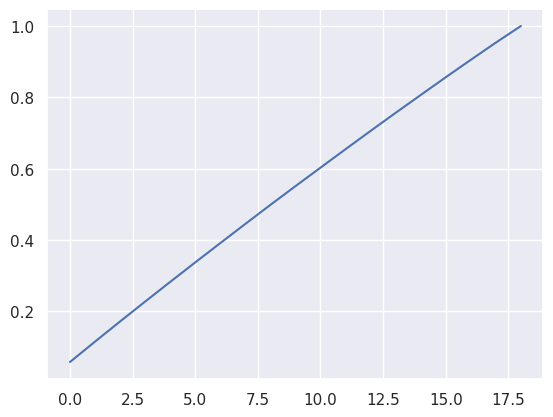

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
X_train = X_train.values.astype(np.float32)
y_train = y_train.values.astype(np.float32)
X_test = X_test.values.astype(np.float32)
y_test = y_test.values.astype(np.float32)

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [ ]:
# Create data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
from torchsummary import summary
import torch
class DNNRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(DNNRegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 16)
        self.fc5 = nn.Linear(16, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))

        return self.fc5(x)

In [ ]:
pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=6bd2ab1c95b17228dcbd01de7df68fde78cdf82a59801a30b169bf3a198848de
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
from torchviz import make_dot
input_size = X_train.shape[1]
model = DNNRegressionModel(input_size)
summary(model, input_size=(input_size, ))
x = torch.randn(1, input_size)
y = model(x)
dot = make_dot(y, params=dict(model.named_parameters()))
dot.render("model_architecture", format="png")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]           2,560
              ReLU-2                  [-1, 128]               0
            Linear-3                   [-1, 64]           8,256
              ReLU-4                   [-1, 64]               0
            Linear-5                   [-1, 32]           2,080
              ReLU-6                   [-1, 32]               0
            Linear-7                   [-1, 16]             528
              ReLU-8                   [-1, 16]               0
            Linear-9                    [-1, 1]              17
Total params: 13,441
Trainable params: 13,441
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.05
Estimated Total Size (MB): 0.06
---------------------------------------------

'model_architecture.png'

19

In [ ]:
def train_and_validate(model, criterion, optimizer, train_loader, test_loader, epochs=50):
    train_losses, val_losses = [], []
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)

        train_loss /= len(train_loader.dataset)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item() * inputs.size(0)

        val_loss /= len(test_loader.dataset)
        val_losses.append(val_loss)

        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    return train_losses, val_losses

In [ ]:
input_size = X_train.shape[1]
learning_rates = [0.001, 0.01, 0.1]
optimizers = ['SGD', 'Adam']
best_val_loss = float('inf')
best_model_state = None
best_hyperparams = {}

In [ ]:
all_losses = {}

for lr in learning_rates:
    for opt in optimizers:
        model = DNNRegressionModel(input_size=input_size)
        criterion = nn.SmoothL1Loss()

        if opt == 'SGD':
            optimizer = optim.SGD(model.parameters(), lr=lr)
        elif opt == 'Adam':
            optimizer = optim.Adam(model.parameters(), lr=lr)

        print(f"\nTraining model with learning rate {lr} and optimizer {opt}")
        train_losses, val_losses = train_and_validate(model, criterion, optimizer, train_loader, test_loader, epochs=50)

        # Store train and val losses for this configuration
        all_losses[(lr, opt)] = (train_losses, val_losses)

        # Check if current model is the best
        if val_losses[-1] < best_val_loss:
            best_val_loss = val_losses[-1]
            best_model_state = model.state_dict()
            best_hyperparams = {'learning_rate': lr, 'optimizer': opt}
            best_train_losses, best_val_losses = train_losses, val_losses



Training model with learning rate 0.001 and optimizer SGD
Epoch [1/50], Train Loss: 66.4707, Validation Loss: 66.3829
Epoch [2/50], Train Loss: 66.2709, Validation Loss: 66.1681
Epoch [3/50], Train Loss: 66.0412, Validation Loss: 65.9184
Epoch [4/50], Train Loss: 65.7479, Validation Loss: 65.5619
Epoch [5/50], Train Loss: 65.2345, Validation Loss: 64.7766
Epoch [6/50], Train Loss: 63.0429, Validation Loss: 58.2400
Epoch [7/50], Train Loss: 19.9794, Validation Loss: 7.3137
Epoch [8/50], Train Loss: 6.6050, Validation Loss: 5.6217
Epoch [9/50], Train Loss: 4.9360, Validation Loss: 4.2222
Epoch [10/50], Train Loss: 3.1368, Validation Loss: 2.3438
Epoch [11/50], Train Loss: 2.5006, Validation Loss: 2.0807
Epoch [12/50], Train Loss: 2.7335, Validation Loss: 3.4922
Epoch [13/50], Train Loss: 2.9390, Validation Loss: 2.5794
Epoch [14/50], Train Loss: 2.8316, Validation Loss: 3.1706
Epoch [15/50], Train Loss: 2.8158, Validation Loss: 3.1122
Epoch [16/50], Train Loss: 2.8200, Validation Loss: 

In [ ]:
# Load the best model
best_model = DNNRegressionModel(input_size=input_size)
best_model.load_state_dict(best_model_state)




<All keys matched successfully>

In [ ]:
torch.save(best_model.state_dict(), 'best_model.pth')

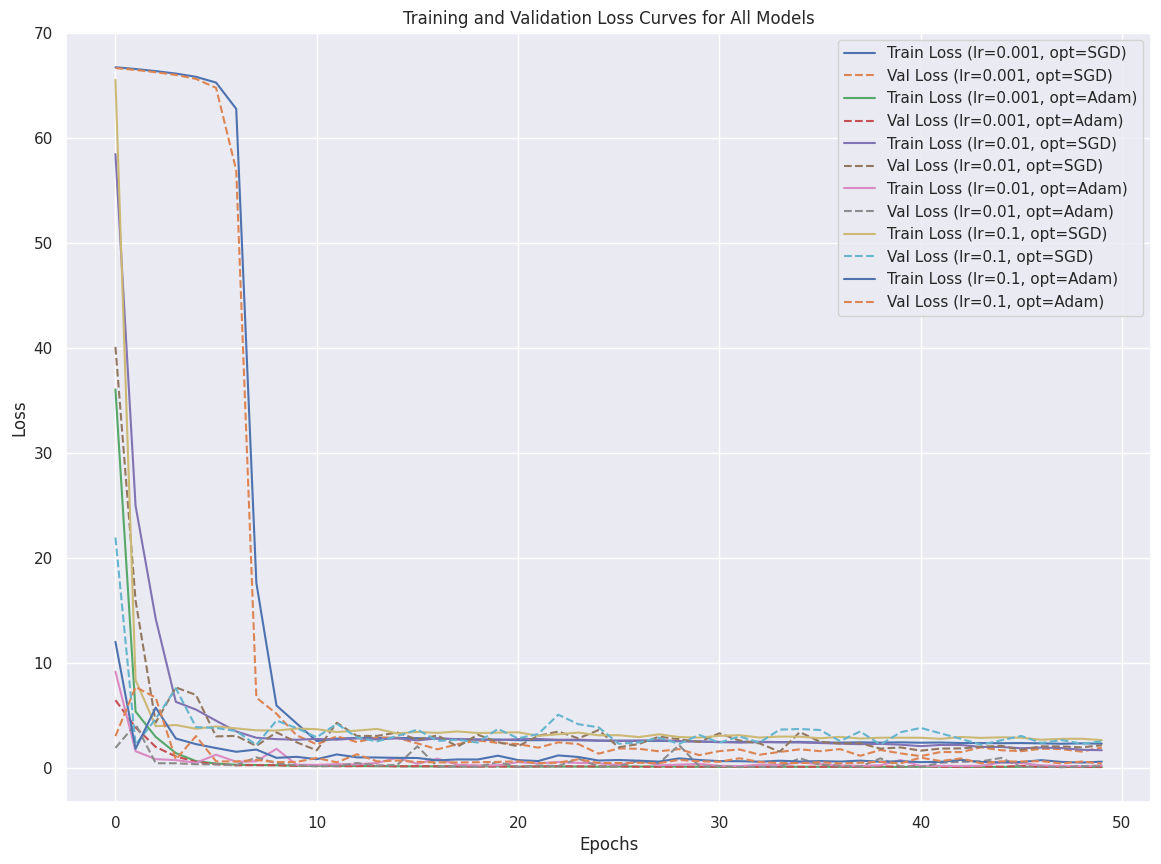

In [ ]:
# Plot loss curves for all models
plt.figure(figsize=(14, 10))
for (lr, opt), (train_losses, val_losses) in all_losses.items():
    plt.plot(train_losses, label=f'Train Loss (lr={lr}, opt={opt})')
    plt.plot(val_losses, label=f'Val Loss (lr={lr}, opt={opt})', linestyle='--')

plt.title("Training and Validation Loss Curves for All Models")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

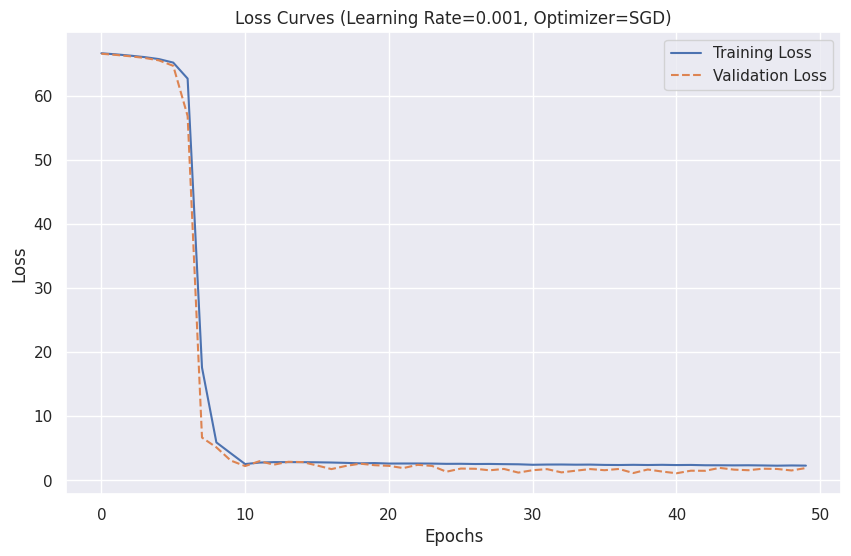

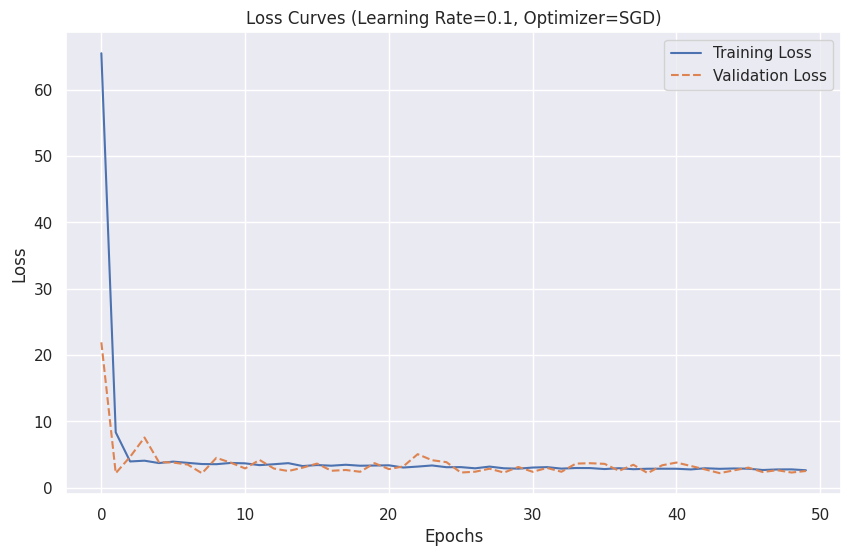

In [ ]:
for (lr, opt), (train_losses, val_losses) in all_losses.items():
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss', linestyle='--')
    plt.title(f"Loss Curves (Learning Rate={lr}, Optimizer={opt})")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

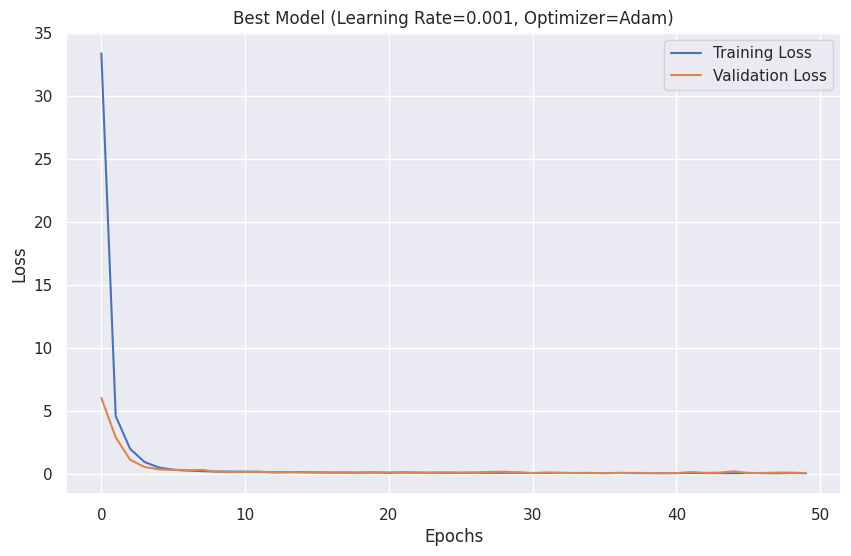

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(best_train_losses, label='Training Loss')
plt.plot(best_val_losses, label='Validation Loss')
plt.title(f"Best Model (Learning Rate={best_hyperparams['learning_rate']}, Optimizer={best_hyperparams['optimizer']})")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
best_model.eval()
with torch.no_grad():
    test_predictions = best_model(X_test_tensor)
    test_loss = criterion(test_predictions, y_test_tensor)
    print(f"Test Loss of the Best Model: {test_loss.item():.4f}")

Test Loss of the Best Model: 0.0866


In [ ]:
rf_mse = mean_squared_error(test_predictions, y_test_tensor)
print(f"Mean Squared Error (MSE) = {rf_mse}")

rf_rmse = np.sqrt(rf_mse)
print(f"Root Mean Squared Error (RMSE) = {rf_rmse}")



Mean Squared Error (MSE) = 0.17397314310073853
Root Mean Squared Error (RMSE) = 0.4171008765697479


In [ ]:
import matplotlib.pyplot as plt
import torch



y_test = y_test_tensor.cpu().detach().numpy()
y_pred = test_predictions.cpu().detach().numpy()

# Plot True vs Predicted Values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Ideal Line')
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('True vs Predicted Values', fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.show()